# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 1 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and first Inspection

1. __Import__ the movies dataset from the CSV file "movies_complete.csv". __Inspect__ the data.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

In [37]:
movies_complete = pd.read_csv('movies_complete.csv', parse_dates= ["release_date"])

In [38]:
movies_complete

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN,NaN,NaN,Iran,1.00,4.00,0.07,90.00,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah
44687,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,Philippines,3.00,9.00,0.18,360.00,An artist struggles to finish his work while a...,NaN,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz
44688,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,United States of America,6.00,3.80,0.90,90.00,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//eGga...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester
44689,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,en,NaN,NaN,Yermoliev,Russia,0.00,NaN,0.00,87.00,"In a small town live two brothers, one a minis...",NaN,<img src='http://image.tmdb.org/t/p/w185//aorB...,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,5,2,Yakov Protazanov


__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [39]:
movies_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

In [40]:
movies_complete.genres[1]

'Adventure|Fantasy|Family'

In [41]:
movies_complete.cast[1]

'Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup|Leonard Zola|Lloyd Berry|Malcolm Stewart|Annabel Kershaw|Darryl Henriques|Robyn Driscoll|Peter Bryant|Sarah Gilson|Florica Vlad|June Lion|Brenda Lockmuller'

In [42]:
movies_complete.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.00,8854.00,7385.00,44691.00,42077.00,44691.00,43179.00,44691.00,44691.00
mean,107186.24,21.67,68.97,111.65,6.00,2.96,97.57,12.48,10.31
std,111806.36,34.36,146.61,495.32,1.28,6.04,34.65,12.12,15.89
min,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,26033.50,2.00,2.41,3.00,5.30,0.40,86.00,6.00,2.00
50%,59110.00,8.20,16.87,10.00,6.10,1.15,95.00,10.00,6.00
75%,154251.00,25.00,67.64,35.00,6.80,3.77,107.00,15.00,12.00
max,469172.00,380.00,2787.97,14075.00,10.00,547.49,1256.00,313.00,435.00


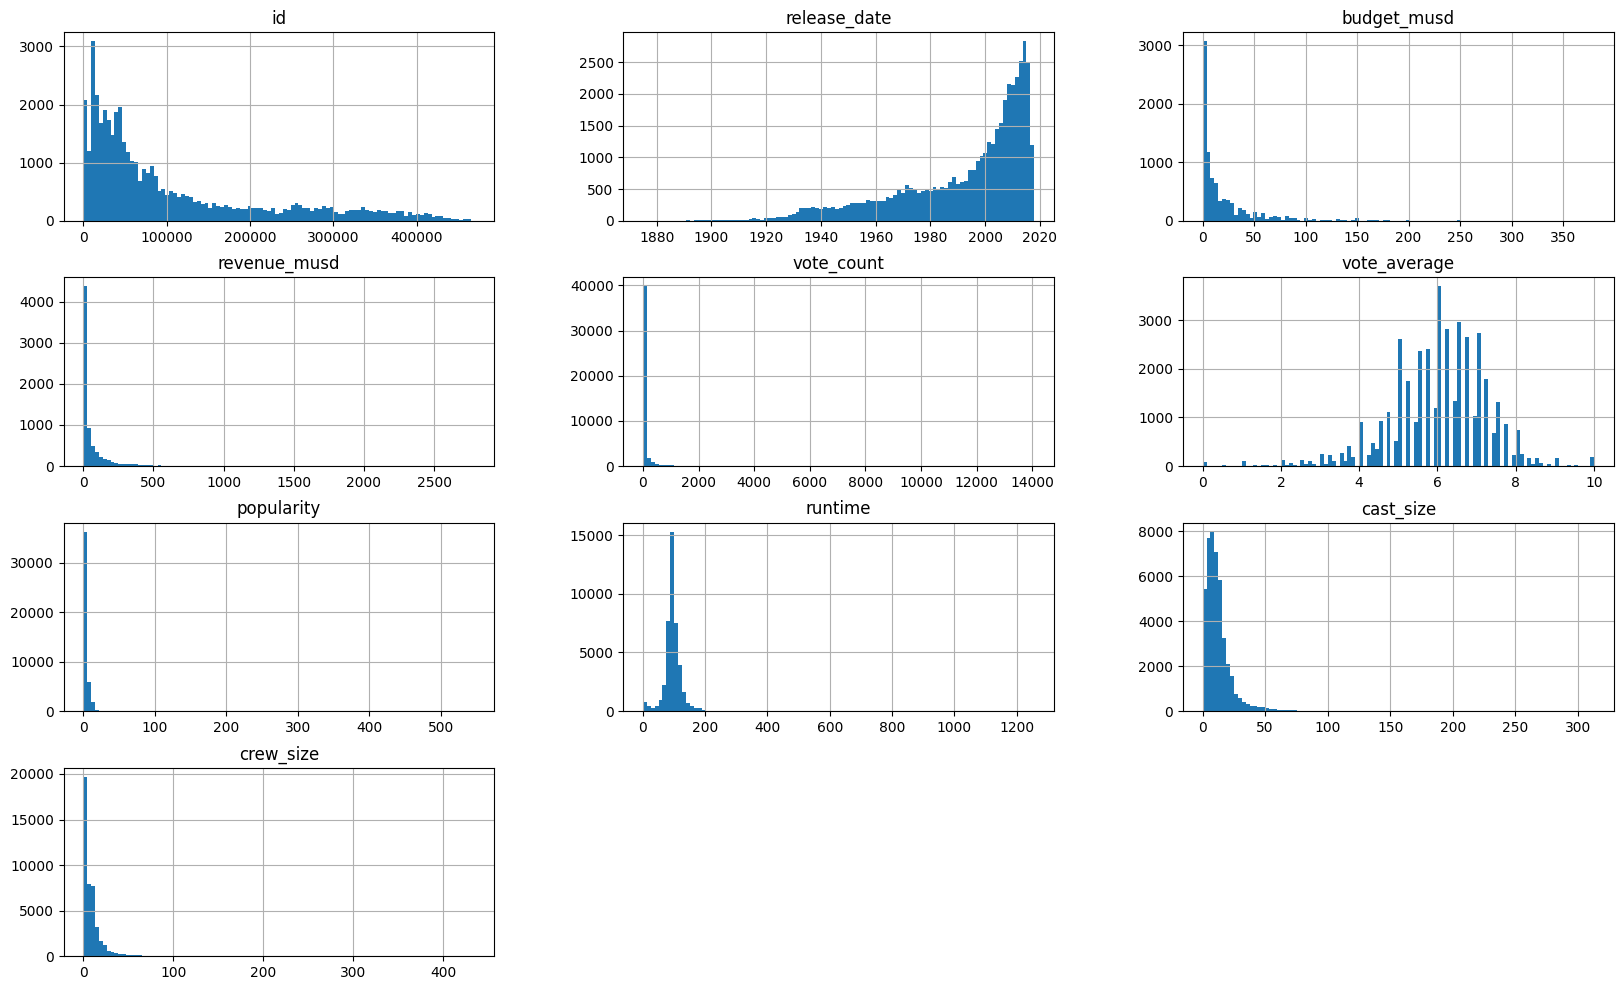

In [43]:
movies_complete.hist(figsize=(20,12), bins=100)
plt.show()

In [44]:
movies_complete.budget_musd.value_counts(dropna=False).head(20)

NaN      35837
5.00       286
10.00      258
20.00      243
2.00       241
15.00      226
3.00       220
25.00      206
1.00       195
30.00      189
4.00       180
6.00       173
12.00      171
40.00      166
8.00       155
35.00      141
0.50       141
7.00       137
50.00      124
1.50       119
Name: budget_musd, dtype: int64

In [45]:
movies_complete.revenue_musd.value_counts(dropna=False).head(20)

NaN      37306
12.00       20
10.00       19
11.00       19
2.00        18
6.00        17
5.00        14
0.50        13
8.00        13
0.00        12
14.00       12
7.00        11
3.00        10
1.00        10
20.00       10
0.00         9
1.50         9
4.00         9
30.00        8
4.10         8
Name: revenue_musd, dtype: int64

In [46]:
movies_complete.vote_average.value_counts(dropna=False)

NaN     2614
6.00    2421
5.00    1969
7.00    1859
6.50    1705
        ... 
9.40       3
9.60       1
9.80       1
0.70       1
1.10       1
Name: vote_average, Length: 93, dtype: int64

In [47]:
movies_complete.vote_count.value_counts()

1.00       3186
2.00       3056
3.00       2729
0.00       2614
4.00       2442
           ... 
2755.00       1
1187.00       1
4200.00       1
3322.00       1
2712.00       1
Name: vote_count, Length: 1820, dtype: int64

In [48]:
movies_complete.describe(include='object')

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,3,24,66


In [49]:
movies_complete[movies_complete['title'] == 'Cinderella']

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
984,11224,Cinderella,The greatest love story ever told.,1950-03-04,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.90,263.59,RKO Radio Pictures|Walt Disney Productions,United States of America,1760.00,6.80,14.44,74.00,Cinderella has faith her dreams of a better li...,English,<img src='http://image.tmdb.org/t/p/w185//avz6...,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna...,11,50,Clyde Geronimi
12988,42884,Cinderella,NaN,1997-11-02,TV Movie|Family|Fantasy|Music|Romance,NaN,en,NaN,NaN,Walt Disney Television|Citadel Entertainment|S...,United States of America,28.00,6.10,2.10,88.00,Updated version of the classic Rodgers and Ham...,English,<img src='http://image.tmdb.org/t/p/w185//54aw...,Brandy Norwood|Whitney Houston|Whoopi Goldberg...,5,1,Robert Iscove
23254,92349,Cinderella,NaN,1914-12-28,Fantasy|Drama,NaN,en,NaN,NaN,NaN,United States of America,7.00,5.40,0.36,52.00,Based on Charles Perrault's fairy tale: Cinder...,English,<img src='http://image.tmdb.org/t/p/w185//bL1K...,Mary Pickford|Owen Moore|Isabel Vernon|Georgia...,7,2,James Kirkwood
23265,105875,Cinderella,The version children love!,2002-08-06,Animation|Family|Fantasy,NaN,en,NaN,NaN,GoodTimes Entertainment,Japan|United States of America,2.00,6.00,2.15,48.00,"Cinderella, the beautiful and kind-hearted rag...",Afrikaans,<img src='http://image.tmdb.org/t/p/w185//rbzG...,Tony Ail|Nathan Aswell|Chera Bailey|Kathleen B...,7,3,Toshiyuki Hiruma
28073,261985,Cinderella,NaN,2011-10-30,Family|TV Movie,NaN,en,NaN,NaN,Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...,Italy,9.00,5.30,0.99,180.00,Once upon a time in post-war Rome: 13-year old...,English,<img src='http://image.tmdb.org/t/p/w185//wjZK...,Vanessa Hessler|Flavio Parenti|Natalia Wörner|...,14,11,Christian Duguay
28340,150689,Cinderella,Midnight is just the beginning.,2015-03-12,Romance|Fantasy|Family|Drama,NaN,en,95.00,543.51,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,United Kingdom|United States of America,2426.00,6.70,19.80,105.00,"When her father unexpectedly passes away, youn...",English,<img src='http://image.tmdb.org/t/p/w185//iH4C...,Lily James|Cate Blanchett|Richard Madden|Helen...,78,80,Kenneth Branagh
33805,42651,Cinderella,NaN,1947-11-28,Comedy|Family|Fantasy,NaN,ru,NaN,NaN,Lenfilm,Russia,5.00,4.80,0.49,80.00,"Based on a classic fairytale ""Cinderella"" bril...",Pусский,<img src='http://image.tmdb.org/t/p/w185//p41r...,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevska...,6,4,Nadezhda Kosheverova
35114,44459,Cinderella,NaN,1957-03-31,Drama|Romance,NaN,en,NaN,NaN,NaN,United States of America,5.00,5.90,0.21,77.00,The first of three TV-versions of the classic ...,English,<img src='http://image.tmdb.org/t/p/w185//cB6I...,Julie Andrews|Howard Lindsay|Howard Lindsay|Il...,9,10,Ralph Nelson
35116,289673,Cinderella,NaN,2000-01-01,NaN,NaN,en,NaN,NaN,NaN,NaN,5.00,5.60,1.09,90.00,Cinderella (named Zezolla) and her family live...,English,<img src='http://image.tmdb.org/t/p/w185//gMYk...,Kathleen Turner|Katrin Cartlidge|David Warner|...,10,6,Beeban Kidron
40439,114108,Cinderella,NaN,1899-10-01,Fantasy|Horror|Science Fiction|Family,NaN,fr,NaN,NaN,Star-Film|Georges Méliès,France,19.00,5.50,1.30,5.00,A fairy godmother magically turns Cinderella's...,No Language,<img src='http://image.tmdb.org/t/p/w185//cf0g...,Georges Méliès|Barral|Bleuette Bernon|Carmely|...,6,2,Georges Méliès


__Define__ an appropriate __user-defined function__ to reuse code.

In [50]:
from IPython.display import HTML

In [51]:
movies_complete.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director'],
      dtype='object')

In [52]:
best_worst = movies_complete[["poster_path", "title", "budget_musd", "revenue_musd","vote_count", "vote_average", "popularity"]].copy()
best_worst

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.00,373.55,5415.00,7.70,21.95
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.00,262.80,2413.00,6.90,17.02
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,NaN,76.58,173.00,5.70,8.39
...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Subdue,NaN,NaN,1.00,4.00,0.07
44687,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Century of Birthing,NaN,NaN,3.00,9.00,0.18
44688,<img src='http://image.tmdb.org/t/p/w185//eGga...,Betrayal,NaN,NaN,6.00,3.80,0.90
44689,<img src='http://image.tmdb.org/t/p/w185//aorB...,Satan Triumphant,NaN,NaN,0.00,NaN,0.00


In [53]:
best_worst['profit_musd'] = movies_complete.revenue_musd.sub(movies_complete.budget_musd)
best_worst['return'] = movies_complete.revenue_musd.div(movies_complete.budget_musd)
best_worst

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,return
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86,65.45,5.09
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,NaN,76.58,173.00,5.70,8.39,NaN,NaN
...,...,...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Subdue,NaN,NaN,1.00,4.00,0.07,NaN,NaN
44687,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Century of Birthing,NaN,NaN,3.00,9.00,0.18,NaN,NaN
44688,<img src='http://image.tmdb.org/t/p/w185//eGga...,Betrayal,NaN,NaN,6.00,3.80,0.90,NaN,NaN
44689,<img src='http://image.tmdb.org/t/p/w185//aorB...,Satan Triumphant,NaN,NaN,0.00,NaN,0.00,NaN,NaN


In [54]:
best_worst.columns = ['', 'Title', 'Budget', 'Revenue', 'Votes', 'Average Rating', 'Popularity', 'Profit', 'ROI']
best_worst.set_index('Title', inplace=True)
best_worst

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,NaN,92.00,6.50,11.71,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.00,81.45,34.00,6.10,3.86,65.45,5.09
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN,76.58,173.00,5.70,8.39,NaN,NaN
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,1.00,4.00,0.07,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,3.00,9.00,0.18,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,6.00,3.80,0.90,NaN,NaN


In [55]:
best_worst.iloc[0,0]

"<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>"

In [56]:
subset = best_worst.iloc[:5,:2]
subset

,,Budget
Title,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.00
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.00
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.00
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN


In [57]:
HTML(subset.to_html(escape=False))

,,Budget
Title,,
Toy Story,,30.00
Jumanji,,65.00
Grumpier Old Men,,NaN
Waiting to Exhale,,16.00
Father of the Bride Part II,,NaN


In [58]:
best_worst.sort_values(by='Average Rating', ascending=False)

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Portrait of a Young Man in Three Movements,NaN,NaN,NaN,1.00,10.00,0.04,NaN,NaN
Brave Revolutionary,<img src='http://image.tmdb.org/t/p/w185//zAb2...,NaN,NaN,1.00,10.00,0.32,NaN,NaN
Other Voices Other Rooms,<img src='http://image.tmdb.org/t/p/w185//4ifP...,NaN,NaN,1.00,10.00,0.04,NaN,NaN
The Lion of Thebes,<img src='http://image.tmdb.org/t/p/w185//tdOc...,NaN,NaN,1.00,10.00,1.78,NaN,NaN
Katt Williams: Priceless: Afterlife,<img src='http://image.tmdb.org/t/p/w185//wKrH...,NaN,NaN,2.00,10.00,0.48,NaN,NaN
...,...,...,...,...,...,...,...,...
Altar of Fire,<img src='http://image.tmdb.org/t/p/w185//iJ78...,NaN,NaN,0.00,NaN,0.00,NaN,NaN
The Wonders of Aladdin,<img src='http://image.tmdb.org/t/p/w185//AvfX...,NaN,NaN,0.00,NaN,0.09,NaN,NaN
Deep Hearts,<img src='http://image.tmdb.org/t/p/w185//8jI4...,NaN,NaN,0.00,NaN,0.01,NaN,NaN


In [59]:
best_worst.sort_values(by='ROI', ascending=False)

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Less Than Zero,<img src='http://image.tmdb.org/t/p/w185//1GY0...,0.00,12.40,77.00,6.10,4.03,12.40,12396383.00
Modern Times,<img src='http://image.tmdb.org/t/p/w185//7uoi...,0.00,8.50,881.00,8.10,8.16,8.50,8500000.00
Welcome to Dongmakgol,<img src='http://image.tmdb.org/t/p/w185//5iGV...,0.00,33.58,49.00,7.70,4.22,33.58,4197476.62
Aquí Entre Nos,<img src='http://image.tmdb.org/t/p/w185//oflx...,0.00,2.76,3.00,6.00,0.23,2.76,2755584.00
"The Karate Kid, Part II",<img src='http://image.tmdb.org/t/p/w185//mSne...,0.00,115.10,457.00,5.90,9.23,115.10,1018619.28
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,1.00,4.00,0.07,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,3.00,9.00,0.18,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,6.00,3.80,0.90,NaN,NaN


In [60]:
best_worst.loc[best_worst.Budget >= 5].sort_values(by='ROI', ascending=False)

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfk...,10.50,792.97,3359.00,7.30,19.36,782.47,75.52
My Big Fat Greek Wedding,<img src='http://image.tmdb.org/t/p/w185//3TB2...,5.00,368.74,686.00,6.20,6.72,363.74,73.75
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfC...,11.00,775.40,6778.00,8.10,42.15,764.40,70.49
Jaws,<img src='http://image.tmdb.org/t/p/w185//s2xc...,7.00,470.65,2628.00,7.50,19.73,463.65,67.24
Crocodile Dundee,<img src='http://image.tmdb.org/t/p/w185//kiwO...,5.00,328.20,512.00,6.30,7.79,323.20,65.64
...,...,...,...,...,...,...,...,...
The Blonde with Bare Breasts,<img src='http://image.tmdb.org/t/p/w185//zBjp...,7.50,NaN,3.00,4.00,0.88,NaN,NaN
Detroit,<img src='http://image.tmdb.org/t/p/w185//7APL...,34.00,NaN,67.00,7.30,9.80,NaN,NaN
"Good Guys Go to Heaven, Bad Guys Go to Pattaya",<img src='http://image.tmdb.org/t/p/w185//cfVB...,5.40,NaN,153.00,5.30,5.61,NaN,NaN


In [61]:
best_worst.Budget.fillna(0, inplace=True)
best_worst.Votes.fillna(0, inplace=True)

In [62]:
best_worst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44467 non-null  object 
 1   Budget          44691 non-null  float64
 2   Revenue         7385 non-null   float64
 3   Votes           44691 non-null  float64
 4   Average Rating  42077 non-null  float64
 5   Popularity      44691 non-null  float64
 6   Profit          5371 non-null   float64
 7   ROI             5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [65]:
def best_or_worst(n, by, ascending=False, min_bud = 0, min_votes = 0):
    best_worst_2 = best_worst.loc[(best_worst.Budget >= min_bud) & (best_worst.Votes >= min_votes), ['', by]].sort_values(by = by, ascending=ascending).head(n).copy()
    
    return HTML(best_worst_2.to_html(escape=False))

__Movies Top 5 - Highest Revenue__

In [66]:
best_or_worst(n = 5, by = 'Revenue')

,,Revenue
Title,,
Avatar,,2787.97
Star Wars: The Force Awakens,,2068.22
Titanic,,1845.03
The Avengers,,1519.56
Jurassic World,,1513.53


__Movies Top 5 - Highest Budget__

In [67]:
best_or_worst(n=5, by= 'Budget')

,,Budget
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.00
Pirates of the Caribbean: At World's End,,300.00
Avengers: Age of Ultron,,280.00
Superman Returns,,270.00
Transformers: The Last Knight,,260.00


__Movies Top 5 - Highest Profit__

In [68]:
best_or_worst(n=5, by='Profit')

,,Profit
Title,,
Avatar,,2550.97
Star Wars: The Force Awakens,,1823.22
Titanic,,1645.03
Jurassic World,,1363.53
Furious 7,,1316.25


__Movies Top 5 - Lowest Profit__

In [77]:
best_or_worst(n=5, by='Profit', ascending=True)

,,Profit
Title,,
The Lone Ranger,,-165.71
The Alamo,,-119.18
Mars Needs Moms,,-111.01
Valerian and the City of a Thousand Planets,,-107.45
The 13th Warrior,,-98.30


__Movies Top 5 - Highest ROI__

In [74]:
best_or_worst(n=5, by='ROI', min_bud=50)

,,ROI
Title,,
Minions,,15.63
Jurassic Park,,14.60
The Twilight Saga: New Moon,,14.20
Deadpool,,13.50
Despicable Me 2,,12.77


__Movies Top 5 - Lowest ROI__

In [78]:
best_or_worst(n=5, by='ROI', ascending=True, min_bud=100)

,,ROI
Title,,
The Adventures of Pluto Nash,,0.07
The Alamo,,0.18
Live by Night,,0.21
Mars Needs Moms,,0.26
The Lone Ranger,,0.35


__Movies Top 5 - Most Votes__

In [79]:
best_or_worst(n=5, by='Votes')

,,Votes
Title,,
Inception,,14075.00
The Dark Knight,,12269.00
Avatar,,12114.00
The Avengers,,12000.00
Deadpool,,11444.00


__Movies Top 5 - Highest Rating__

In [82]:
best_or_worst(n=5, by='Average Rating', min_votes=50)

,,Average Rating
Title,,
Planet Earth II,,9.50
Dilwale Dulhania Le Jayenge,,9.10
Planet Earth,,8.80
Sansho the Bailiff,,8.70
The Jinx: The Life and Deaths of Robert Durst,,8.60


__Movies Top 5 - Lowest Rating__

In [84]:
best_or_worst(n=5, by='Average Rating', ascending=True, min_votes=100)

,,Average Rating
Title,,
House of the Dead,,2.80
Dragonball Evolution,,2.90
Battlefield Earth,,3.00
Disaster Movie,,3.10
Alone in the Dark,,3.10


In [85]:
best_or_worst(n=5, by='Average Rating', ascending=True, min_bud=20, min_votes=20)

,,Average Rating
Title,,
Foodfight!,,2.30
Dragonball Evolution,,2.90
Battlefield Earth,,3.00
Disaster Movie,,3.10
Alone in the Dark,,3.10


__Movies Top 5 - Most Popular__

In [86]:
best_or_worst(n=5, by='Popularity')

,,Popularity
Title,,
Minions,,547.49
Wonder Woman,,294.34
Beauty and the Beast,,287.25
Baby Driver,,228.03
Big Hero 6,,213.85


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

In [87]:
movies_complete.genres[0]

'Animation|Comedy|Family'

In [88]:
mask_genres = movies_complete.genres.str.contains('Science Fiction') & movies_complete.genres.str.contains('Action')
mask_genres

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: genres, Length: 44691, dtype: bool

In [89]:
movies_complete.cast[0]

'Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette'

In [92]:
mask_actor = movies_complete.cast.str.contains('Bruce Willis')
mask_actor

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690      NaN
Name: cast, Length: 44691, dtype: object

In [ ]:
movies_complete.loc[mask_actor & mask_genres, ["title", "vote_average"]].sort_values(by='vote_average', ascending=False)

In [98]:
bruce = movies_complete.loc[mask_actor & mask_genres, ["title", 'poster_path', "vote_average"]].sort_values(by='vote_average', ascending=False)

In [99]:
HTML(bruce.to_html(escape=False))

,title,poster_path,vote_average
1448,The Fifth Element,,7.30
19218,Looper,,6.60
1786,Armageddon,,6.50
14135,Surrogates,,5.90
20333,G.I. Joe: Retaliation,,5.40
27619,Vice,,4.10


__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

In [100]:
mask_actor_uma = movies_complete.cast.str.contains('Uma Thurman')
mask_actor_uma

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690      NaN
Name: cast, Length: 44691, dtype: object

In [101]:
movies_complete.director[0]

'John Lasseter'

In [102]:
mask_director_quentin = movies_complete.director.str.contains('Quentin Tarantino')
mask_director_quentin

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: director, Length: 44691, dtype: object

In [104]:
movies_complete.loc[mask_actor_uma & mask_director_quentin, ["title", "runtime"]].sort_values(by='runtime', ascending=True)

,title,runtime
6667,Kill Bill: Vol. 1,111.00
7208,Kill Bill: Vol. 2,136.00
291,Pulp Fiction,154.00


In [105]:
uma_quentin = movies_complete.loc[mask_actor_uma & mask_director_quentin, ["title", "poster_path", "runtime"]].sort_values(by='runtime', ascending=True)

In [106]:
HTML(uma_quentin.to_html(escape=False))

,title,poster_path,runtime
6667,Kill Bill: Vol. 1,,111.00
7208,Kill Bill: Vol. 2,,136.00
291,Pulp Fiction,,154.00


__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

In [107]:
movies_complete.production_companies[0]

'Pixar Animation Studios'

In [110]:
mask_production_pixar = movies_complete.production_companies.str.contains('Pixar Animation Studios')
mask_production_pixar

0         True
1        False
2        False
3        False
4        False
         ...  
44686      NaN
44687    False
44688    False
44689    False
44690      NaN
Name: production_companies, Length: 44691, dtype: object

In [111]:
mask_years_2010_2015 = movies_complete.release_date.between('2010-01-01', '2016-01-01')
mask_years_2010_2015

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687     True
44688    False
44689    False
44690    False
Name: release_date, Length: 44691, dtype: bool

In [112]:
movies_complete.loc[mask_production_pixar & mask_years_2010_2015, ["title", "revenue_musd"]].sort_values(by='revenue_musd', ascending=False)

,title,revenue_musd
15236,Toy Story 3,1066.97
29957,Inside Out,857.61
20888,Monsters University,743.56
17220,Cars 2,559.85
18900,Brave,538.98
30388,The Good Dinosaur,331.93
16392,Day & Night,NaN
21694,The Blue Umbrella,NaN
21697,Toy Story of Terror!,NaN
22489,La luna,NaN


In [113]:
pixar = movies_complete.loc[mask_production_pixar & mask_years_2010_2015, ["title","poster_path", "release_date","revenue_musd"]].sort_values(by='revenue_musd', ascending=False).set_index("title")

In [114]:
HTML(pixar.to_html(escape=False))

,poster_path,release_date,revenue_musd
title,,,
Toy Story 3,,2010-06-16,1066.97
Inside Out,,2015-06-09,857.61
Monsters University,,2013-06-20,743.56
Cars 2,,2011-06-11,559.85
Brave,,2012-06-21,538.98
The Good Dinosaur,,2015-11-14,331.93
Day & Night,,2010-06-17,NaN
The Blue Umbrella,,2013-02-12,NaN
Toy Story of Terror!,,2013-10-15,NaN


__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [116]:
mask_genres_act_thr = movies_complete.genres.str.contains('Action') | movies_complete.genres.str.contains('Thriller')
mask_genres_act_thr

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688     True
44689    False
44690    False
Name: genres, Length: 44691, dtype: bool

In [118]:
mask_language = movies_complete.original_language == 'en'

In [119]:
mask_vote_av = movies_complete.vote_average >= 7.5

In [120]:
mask_vote_co = movies_complete.vote_count >= 10

In [121]:
english = movies_complete.loc[mask_genres_act_thr & mask_language & mask_vote_av & mask_vote_co, ["title","poster_path", "genres", "vote_average", "vote_count", "release_date"]].sort_values(by='release_date', ascending=False).set_index("title").head(20)

In [122]:
HTML(english.to_html(escape=False))

,poster_path,genres,vote_average,vote_count,release_date
title,,,,,
Descendants 2,,TV Movie|Family|Action|Comedy|Music|Adventure,7.50,171.00,2017-07-21
Dunkirk,,Action|Drama|History|Thriller|War,7.50,2712.00,2017-07-19
The Book of Henry,,Thriller|Drama|Crime,7.60,84.00,2017-06-16
Guardians of the Galaxy Vol. 2,,Action|Adventure|Comedy|Science Fiction,7.60,4858.00,2017-04-19
Logan,,Action|Drama|Science Fiction,7.60,6310.00,2017-02-28
The Thinning,,Thriller,7.60,92.00,2016-10-12
11.22.63,,Drama|History|Thriller,8.00,213.00,2016-02-15
Star Wars: The Force Awakens,,Action|Adventure|Science Fiction|Fantasy,7.50,7993.00,2015-12-15
London Spy,,Romance|Crime|Drama|Mystery|Thriller,8.80,12.00,2015-11-09


## What are the most common Words in Movie Titles and Taglines?

In [123]:
from wordcloud import WordCloud

In [124]:
movies_complete.tagline[1]

'Roll the dice and unleash the excitement!'

In [125]:
movies_complete.overview[1]

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures."

In [126]:
title = movies_complete.title.dropna()
tagline = movies_complete.tagline.dropna()
overview = movies_complete.overview.dropna()

In [127]:
title

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
44686                         Subdue
44687            Century of Birthing
44688                       Betrayal
44689               Satan Triumphant
44690                       Queerama
Name: title, Length: 44691, dtype: object

In [128]:
' '.join(title)

'Toy Story Jumanji Grumpier Old Men Waiting to Exhale Father of the Bride Part II Heat Sabrina Tom and Huck Sudden Death GoldenEye The American President Dracula: Dead and Loving It Balto Nixon Cutthroat Island Casino Sense and Sensibility Four Rooms Ace Ventura: When Nature Calls Money Train Get Shorty Copycat Assassins Powder Leaving Las Vegas Othello Now and Then Persuasion The City of Lost Children Shanghai Triad Dangerous Minds Twelve Monkeys Wings of Courage Babe Carrington Dead Man Walking Across the Sea of Time It Takes Two Clueless Cry, the Beloved Country Richard III Dead Presidents Restoration Mortal Kombat To Die For How To Make An American Quilt Se7en Pocahontas When Night Is Falling The Usual Suspects Guardian Angel Mighty Aphrodite Lamerica The Big Green Georgia Kids of the Round Table Home for the Holidays The Postman The Confessional The Indian in the Cupboard Eye for an Eye Mr. Holland\'s Opus Don\'t Be a Menace to South Central While Drinking Your Juice in the Hood T

In [129]:
title_corpus = ' '.join(title)
tagline_corpus = ' '.join(tagline)
overview_corpus = ' '.join(overview)

In [130]:
title_wordcloud = WordCloud(background_color='white', width=4000, height=2000, max_words=200).generate(title_corpus)
title_wordcloud

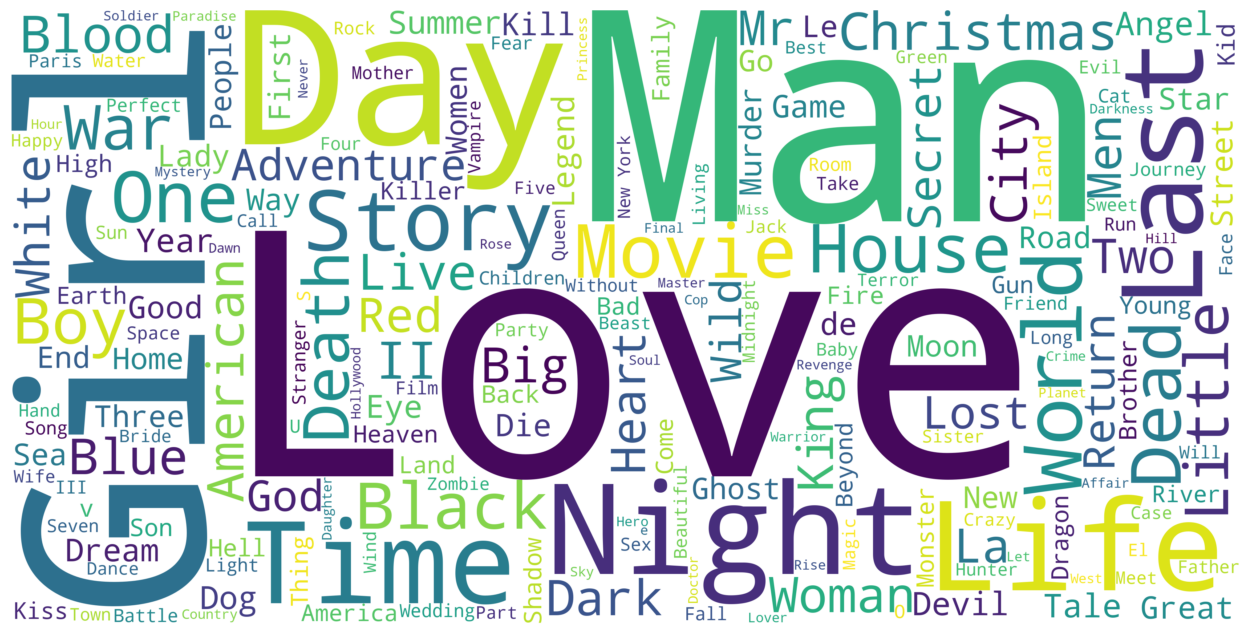

In [131]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [132]:
tagline_wordcloud = WordCloud(background_color='white', width=4000, height=2000, max_words=200).generate(tagline_corpus)
tagline_wordcloud

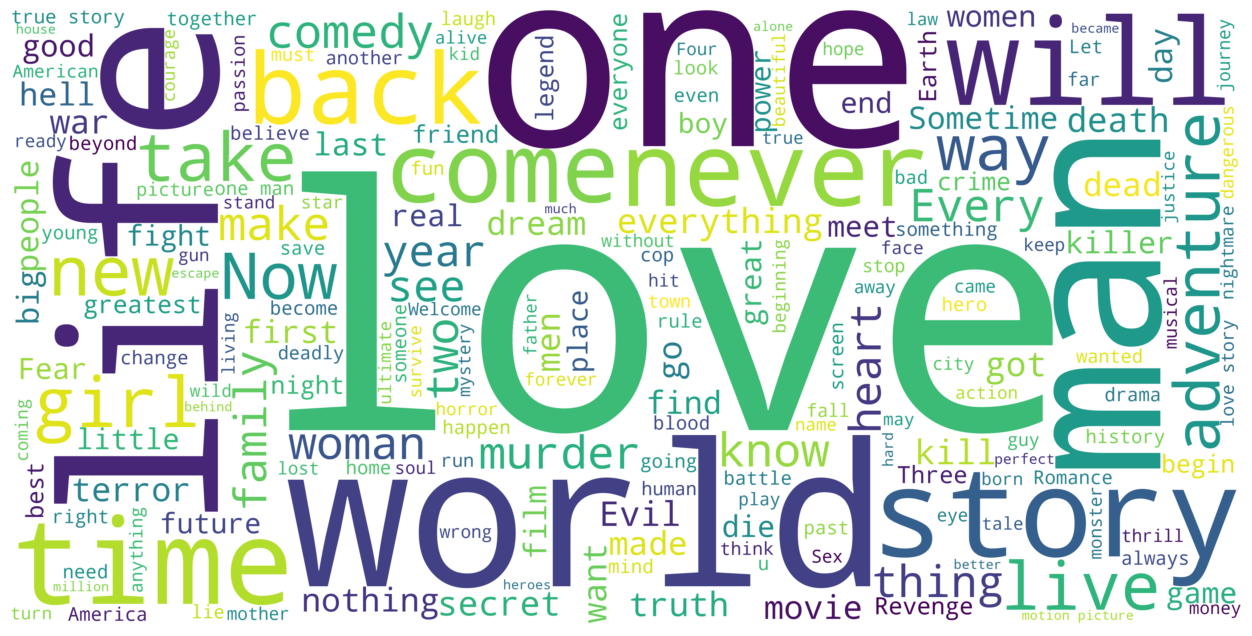

In [135]:
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [134]:
overview_wordcloud = WordCloud(background_color='white', width=4000, height=2000, max_words=200).generate(overview_corpus)
overview_wordcloud

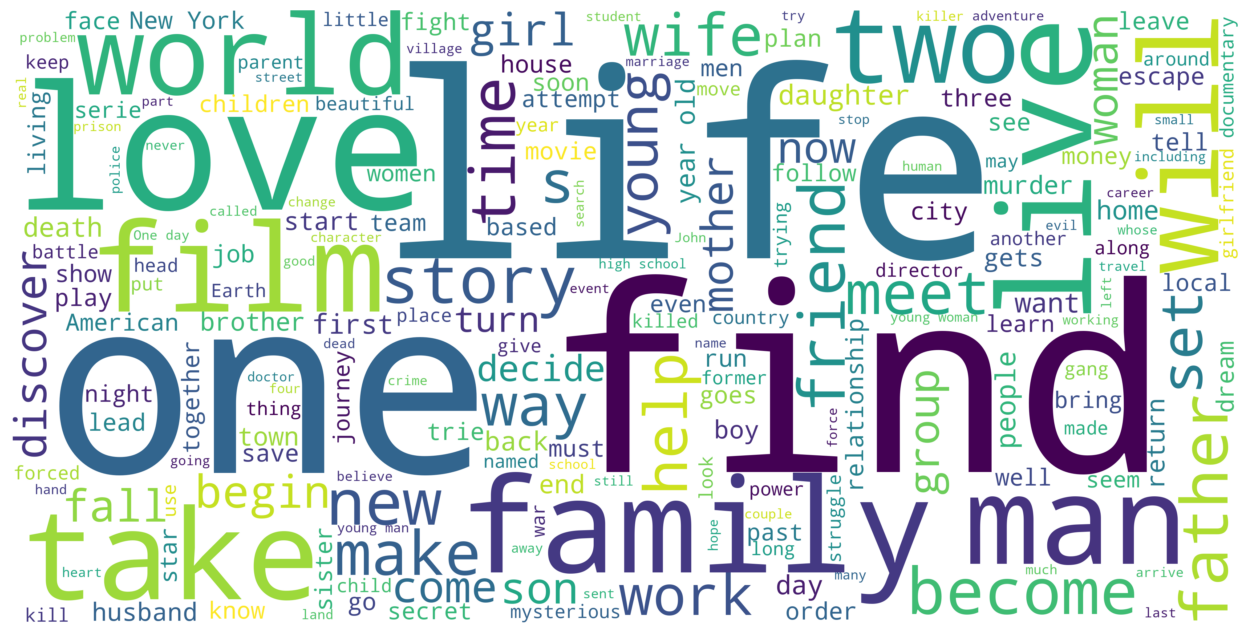

In [136]:
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

In [137]:
movies_complete['Franchise'] = movies_complete.belongs_to_collection.notna()

In [138]:
movies_complete.Franchise

0         True
1        False
2         True
3        False
4         True
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: Franchise, Length: 44691, dtype: bool

In [139]:
movies_complete.Franchise.value_counts()

False    40228
True      4463
Name: Franchise, dtype: int64

__Franchise vs. Stand-alone: Average Revenue__

In [142]:
movies_complete.groupby('Franchise').revenue_musd.mean()

Franchise
False    44.74
True    165.71
Name: revenue_musd, dtype: float64

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [143]:
movies_complete['ROI'] = movies_complete.revenue_musd.div(movies_complete.budget_musd)

In [144]:
movies_complete.groupby('Franchise').ROI.median()

Franchise
False   1.62
True    3.71
Name: ROI, dtype: float64

__Franchise vs. Stand-alone: Average Budget__

In [145]:
movies_complete.groupby('Franchise').budget_musd.mean()

Franchise
False   18.05
True    38.32
Name: budget_musd, dtype: float64

__Franchise vs. Stand-alone: Average Popularity__

In [146]:
movies_complete.groupby('Franchise').popularity.mean()

Franchise
False   2.59
True    6.25
Name: popularity, dtype: float64

__Franchise vs. Stand-alone: Average Rating__

In [149]:
movies_complete.groupby('Franchise').vote_average.mean()

Franchise
False   6.01
True    5.96
Name: vote_average, dtype: float64

## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [150]:
movies_complete.belongs_to_collection

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
44686                               NaN
44687                               NaN
44688                               NaN
44689                               NaN
44690                               NaN
Name: belongs_to_collection, Length: 44691, dtype: object

In [151]:
movies_complete.belongs_to_collection.value_counts()

The Bowery Boys                  29
Totò Collection                  27
Zatôichi: The Blind Swordsman    26
James Bond Collection            26
The Carry On Collection          25
                                 ..
Salt and Pepper Collection        1
Deadpool Collection               1
Ant-Man Collection                1
Elvira Collection                 1
Red Lotus Collection              1
Name: belongs_to_collection, Length: 1691, dtype: int64

In [153]:
franchises = movies_complete.groupby('belongs_to_collection').agg({'title':'count','budget_musd':['sum','mean'],'revenue_musd':['sum','mean'],'vote_average': 'mean','popularity':'mean','ROI':'median','vote_count':'mean'})
franchises

title budget_musd       revenue_musd  \
                                     count         sum  mean          sum   
belongs_to_collection                                                       
... Has Fallen Collection                2      130.00 65.00       366.78   
00 Schneider Filmreihe                   1        0.00   NaN         0.00   
08/15 Collection                         1        0.00   NaN         0.00   
100 Girls Collection                     2        0.00   NaN         0.00   
101 Dalmatians (Animated) Collection     2        4.00  4.00       215.88   
...                                    ...         ...   ...          ...   
Сказки Чуковского                        1        0.00   NaN         0.00   
Чебурашка и крокодил Гена                1        0.00   NaN         0.00   
Что Творят мужчины! (Коллекция)          2        2.00  2.00         0.00   
男はつらいよ シリーズ                              3        0.00   NaN         0.00   
식객 시리즈                                   2        0.00   NaN         0.00   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
... Has Fallen Collection            183.39         6.00      13.01   2.86   
00 Schneider Filmreihe                  NaN         6.50       1.93    NaN   
08/15 Collection                        NaN         5.90       0.63    NaN   
100 Girls Collection                    NaN         5.15       3.08    NaN   
101 Dalmatians (Animated) Collection 215.88         6.25      13.06  53.97   
...                                     ...          ...        ...    ...   
Сказки Чуковского                       NaN         3.00       0.73    NaN   
Чебурашка и крокодил Гена               NaN         6.70       0.88    NaN   
Что Творят мужчины! (Коллекция)         NaN         3.15       1.30    NaN   
男はつらいよ シリーズ                             NaN         7.00       0.04    NaN   
식객 시리즈                                  NaN         4.95       0.16    NaN   

                                     vote_count  
                                           mean  
belongs_to_collection                            
... Has Fallen Collection               2333.00  
00 Schneider Filmreihe                    16.00  
08/15 Collection                           4.00  
100 Girls Collection                      64.00  
101 Dalmatians (Animated) Collection     937.00  
...                                         ...  
Сказки Чуковского                          3.00  
Чебурашка и крокодил Гена                  7.00  
Что Творят мужчины! (Коллекция)            5.50  
男はつらいよ シリーズ                                0.67  
식객 시리즈                                     3.50  

[1691 rows x 9 columns]

In [154]:
franchises.nlargest(20,('title','count'))

title budget_musd       revenue_musd  \
                                       count         sum  mean          sum   
belongs_to_collection                                                         
The Bowery Boys                           29        0.00   NaN         0.00   
Totò Collection                           27        0.00   NaN         0.00   
James Bond Collection                     26     1539.65 59.22      7106.97   
Zatôichi: The Blind Swordsman             26        0.00   NaN         0.00   
The Carry On Collection                   25        0.00   NaN         0.00   
Charlie Chan (Sidney Toler) Collection    21        0.00   NaN         0.00   
Pokémon Collection                        20      250.72 50.14       601.87   
Godzilla (Showa) Collection               16        2.81  0.56         0.00   
Charlie Chan (Warner Oland) Collection    15        0.00   NaN         0.00   
Dragon Ball Z (Movie) Collection          15        5.00  5.00       112.12   
Uuno Turhapuro                            15        0.00   NaN         0.00   
Monster High Collection                   14        0.50  0.50         0.00   
The Land Before Time Collection           14       12.30 12.30        84.46   
George Carlin Comedy Collection           13        0.00   NaN         0.00   
Sharpe Collection                         13        0.00   NaN         0.00   
Friday the 13th Collection                12       84.40  7.03       464.90   
Johan Falk GSI Collection                 12        0.00   NaN         0.00   
Sherlock Holmes (1939 series)             12        0.00   NaN         0.00   
The Amityville Horror Collection          12       21.02  5.25       213.35   
An American Girl Collection               10        6.80  6.80         0.00   

                                              vote_average popularity    ROI  \
                                         mean         mean       mean median   
belongs_to_collection                                                          
The Bowery Boys                           NaN         6.67       0.20    NaN   
Totò Collection                           NaN         6.84       1.05    NaN   
James Bond Collection                  273.35         6.34      13.45   6.13   
Zatôichi: The Blind Swordsman             NaN         6.40       1.10    NaN   
The Carry On Collection                   NaN         6.17       3.22    NaN   
Charlie Chan (Sidney Toler) Collection    NaN         6.61       0.63    NaN   
Pokémon Collection                      66.87         6.05       4.37   4.46   
Godzilla (Showa) Collection               NaN         5.97       3.42    NaN   
Charlie Chan (Warner Oland) Collection    NaN         6.66       0.66    NaN   
Dragon Ball Z (Movie) Collection        56.06         6.61       6.18  12.35   
Uuno Turhapuro                            NaN         5.53       0.17    NaN   
Monster High Collection                   NaN         6.49       3.59    NaN   
The Land Before Time Collection         84.46         6.16       4.91   6.87   
George Carlin Comedy Collection           NaN         7.47       1.30    NaN   
Sharpe Collection                         NaN         6.74       1.71    NaN   
Friday the 13th Collection              38.74         5.42       9.76   6.67   
Johan Falk GSI Collection                 NaN         6.50       1.52    NaN   
Sherlock Holmes (1939 series)             NaN         6.92       2.88    NaN   
The Amityville Horror Collection        53.34         4.36       7.18   5.69   
An American Girl Collection               NaN         5.25       1.94    NaN   

                                       vote_count  
                                             mean  
belongs_to_collection                              
The Bowery Boys                              0.72  
Totò Collection                             18.04  
James Bond Collection                     1284.31  
Zatôichi: The Blind Swordsman               11.19  
The Carry On Col

In [156]:
franchises.nlargest(20,('budget_musd','sum'))

title budget_musd        revenue_musd  \
                                        count         sum   mean          sum   
belongs_to_collection                                                           
James Bond Collection                      26     1539.65  59.22      7106.97   
Harry Potter Collection                     8     1280.00 160.00      7707.37   
Pirates of the Caribbean Collection         5     1250.00 250.00      4521.58   
The Fast and the Furious Collection         8     1009.00 126.12      5125.10   
X-Men Collection                            6      983.00 163.83      2808.83   
Transformers Collection                     5      965.00 193.00      4366.10   
Star Wars Collection                        8      854.35 106.79      7434.49   
The Hobbit Collection                       3      750.00 250.00      2935.52   
The Terminator Collection                   5      661.40 132.28      1845.33   
Mission: Impossible Collection              5      650.00 130.00      2778.98   
Spider-Man Collection                       3      597.00 199.00      2496.35   
The Dark Knight Collection                  3      585.00 195.00      2463.72   
Captain America Collection                  3      560.00 186.67      2238.64   
The Chronicles of Narnia Collection         3      560.00 186.67      1584.14   
Iron Man Collection                         3      540.00 180.00      2424.55   
Shrek Collection                            5      535.00 133.75      2955.81   
Star Trek: Alternate Reality Collection     3      525.00 175.00      1196.52   
Madagascar Collection                       4      502.00 125.50      2257.05   
The Avengers Collection                     2      500.00 250.00      2924.96   
Cars Collection                             3      495.00 165.00      1372.01   

                                                vote_average popularity  \
                                           mean         mean       mean   
belongs_to_collection                                                     
James Bond Collection                    273.35         6.34      13.45   
Harry Potter Collection                  963.42         7.54      26.25   
Pirates of the Caribbean Collection      904.32         6.88      53.97   
The Fast and the Furious Collection      640.64         6.66      10.80   
X-Men Collection                         468.14         6.82       9.71   
Transformers Collection                  873.22         6.14      14.43   
Star Wars Collection                     929.31         7.38      23.41   
The Hobbit Collection                    978.51         7.23      25.21   
The Terminator Collection                369.07         6.54      21.89   
Mission: Impossible Collection           555.80         6.60      16.51   
Spider-Man Collection                    832.12         6.47      22.62   
The Dark Knight Collection               821.24         7.80      57.42   
Captain America Collection               746.21         7.10      61.31   
The Chronicles of Narnia Collection      528.05         6.40      14.34   
Iron Man Collection                      808.18         6.93      21.63   
Shrek Collection                         738.95         6.46      12.97   
Star Trek: Alternate Reality Collection  398.84         7.13      17.27   
Madagascar Collection                    564.26         6.42      16.21   
The Avengers Collection                 1462.48         7.35      63.63   
Cars Collection                          457.34         6.33      17.25   

                                           ROI vote_count  
                                        median       mean  
belongs_to_collection                                      
James Bond Collection                     6.13    1284.31  
Harry Potter Collection                   6.17    5983.25  
Pirates of the Caribbean Collection       3.45    5016.00  
The Fast and the Furious Collection       4.94    3197.00  
X-Men Collection              

In [157]:
franchises.nlargest(20,('revenue_musd','sum'))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
Harry Potter Collection                 8     1280.00 160.00      7707.37   
Star Wars Collection                    8      854.35 106.79      7434.49   
James Bond Collection                  26     1539.65  59.22      7106.97   
The Fast and the Furious Collection     8     1009.00 126.12      5125.10   
Pirates of the Caribbean Collection     5     1250.00 250.00      4521.58   
Transformers Collection                 5      965.00 193.00      4366.10   
Despicable Me Collection                6      299.00  74.75      3691.07   
The Twilight Collection                 5      385.00  77.00      3342.11   
Ice Age Collection                      5      429.00  85.80      3216.71   
Jurassic Park Collection                4      379.00  94.75      3031.48   
Shrek Collection                        5      535.00 133.75      2955.81   
The Hunger Games Collection             4      490.00 122.50      2944.16   
The Hobbit Collection                   3      750.00 250.00      2935.52   
The Avengers Collection                 2      500.00 250.00      2924.96   
The Lord of the Rings Collection        3      266.00  88.67      2916.54   
X-Men Collection                        6      983.00 163.83      2808.83   
Avatar Collection                       1      237.00 237.00      2787.97   
Mission: Impossible Collection          5      650.00 130.00      2778.98   
Spider-Man Collection                   3      597.00 199.00      2496.35   
The Dark Knight Collection              3      585.00 195.00      2463.72   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
Harry Potter Collection              963.42         7.54      26.25   6.17   
Star Wars Collection                 929.31         7.38      23.41   8.24   
James Bond Collection                273.35         6.34      13.45   6.13   
The Fast and the Furious Collection  640.64         6.66      10.80   4.94   
Pirates of the Caribbean Collection  904.32         6.88      53.97   3.45   
Transformers Collection              873.22         6.14      14.43   5.20   
Despicable Me Collection             922.77         6.78     106.72  12.76   
The Twilight Collection              668.42         5.84      29.50  10.27   
Ice Age Collection                   643.34         6.38      16.08   8.26   
Jurassic Park Collection             757.87         6.50      10.77   7.03   
Shrek Collection                     738.95         6.46      12.97   5.56   
The Hunger Games Collection          736.04         6.88      54.77   6.27   
The Hobbit Collection                978.51         7.23      25.21   3.83   
The Avengers Collection             1462.48         7.35      63.63   5.96   
The Lord of the Rings Collection     972.18         8.03      30.27  11.73   
X-Men Collection                     468.14         6.82       9.71   3.02   
Avatar Collection                   2787.97         7.20     185.07  11.76   
Mission: Impossible Collection       555.80         6.60      16.51   4.55   
Spider-Man Collection                832.12         6.47      22.62   3.92   
The Dark Knight Collection           821.24         7.80      57.42   4.34   

                                    vote_count  
                                          mean  
belongs_to_collection                           
Harry Potter Collection                5983.25  
Star Wars Collection                   5430.38  
James Bond Collection                  1284.31  
The Fast and the Furious Collection    3197.00  
Pirates of the Caribbean Collection    5016.00  
Transformers Collection                3046.40  
Despicable Me Collection    

In [159]:
franchises.nlargest(20,('vote_average','mean'))

title budget_musd       revenue_musd  \
                                    count         sum  mean          sum   
belongs_to_collection                                                      
Argo Collection                         1        0.00   NaN         0.00   
Bloodfight                              1        0.00   NaN         0.00   
Dreileben                               1        0.00   NaN         0.00   
Kenji Misumi's Trilogy of the Sword     1        0.00   NaN         0.00   
Алиса в стране чудес (Коллекция)        1        0.00   NaN         0.00   
We Were Here                            2        0.00   NaN         0.00   
Kizumonogatari                          3        0.00   NaN         0.00   
Glass Tiger collection                  1        0.00   NaN         0.00   
OSS 117 The Original Saga               1        0.00   NaN         0.00   
Spirits' Homecoming Collection          1        0.00   NaN         0.00   
The Nigger Charley Collection           1        0.00   NaN         0.00   
The Human Condition                     3        0.00   NaN         0.00   
Little Forest Collection                2        0.00   NaN         0.00   
Psy Collection                          2        0.00   NaN         0.00   
Kiler Collection                        2        0.00   NaN         0.00   
The Lord of the Rings Collection        3      266.00 88.67      2916.54   
In the Vineyard Collection              1        0.00   NaN         0.00   
Macskafogó gyűjtemény                   1        0.00   NaN         0.00   
The Apu Collection                      3        0.00   NaN         0.72   
The South Shaolin Master Collection     1        0.00   NaN         0.00   

                                           vote_average popularity    ROI  \
                                      mean         mean       mean median   
belongs_to_collection                                                       
Argo Collection                        NaN         9.30       0.50    NaN   
Bloodfight                             NaN         9.00       0.26    NaN   
Dreileben                              NaN         9.00       0.09    NaN   
Kenji Misumi's Trilogy of the Sword    NaN         9.00       0.66    NaN   
Алиса в стране чудес (Коллекция)       NaN         8.70       0.32    NaN   
We Were Here                           NaN         8.65       1.20    NaN   
Kizumonogatari                         NaN         8.63       2.75    NaN   
Glass Tiger collection                 NaN         8.50       0.81    NaN   
OSS 117 The Original Saga              NaN         8.50       0.17    NaN   
Spirits' Homecoming Collection         NaN         8.50       1.26    NaN   
The Nigger Charley Collection          NaN         8.50       0.13    NaN   
The Human Condition                    NaN         8.47       2.33    NaN   
Little Forest Collection               NaN         8.35       1.73    NaN   
Psy Collection                         NaN         8.20       0.65    NaN   
Kiler Collection                       NaN         8.10       1.27    NaN   
The Lord of the Rings Collection    972.18         8.03      30.27  11.73   
In the Vineyard Collection             NaN         8.00       0.52    NaN   
Macskafogó gyűjtemény                  NaN         8.00       1.84    NaN   
The Apu Collection                    0.24         8.00       3.03    NaN   
The South Shaolin Master Collection    NaN         8.00       0.67    NaN   

                                    vote_count  
                                          mean  
belongs_to_collection                           
Argo Collection                           2.00  
Bloodfight                                1.00  
Dreileben                                 2.00  
Kenji Misumi's Trilogy of the Sword       2.00  
Алиса в стране чудес (Коллекция)          6.00  
We Were Here                              4.00  
Kizumonogatari                           10.67  
Glass Tiger collection   

In [160]:
franchises[franchises['vote_count','mean'] >= 1000].nlargest(20,('vote_average','mean'))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
The Lord of the Rings Collection        3      266.00  88.67      2916.54   
The Godfather Collection                3       73.00  24.33       429.38   
Blade Runner Collection                 1       28.00  28.00        33.14   
The Man With No Name Collection         3        2.00   0.67        35.50   
The Dark Knight Collection              3      585.00 195.00      2463.72   
Guardians of the Galaxy Collection      2      370.00 185.00      1636.74   
Kill Bill Collection                    2       60.00  30.00       333.11   
Kingsman Collection                     1       81.00  81.00       414.35   
How to Train Your Dragon Collection     2      310.00 155.00      1104.00   
Harry Potter Collection                 8     1280.00 160.00      7707.37   
Toy Story Collection                    3      320.00 106.67      1937.89   
Back to the Future Collection           3       99.00  33.00       957.64   
Trainspotting Collection                2       22.00  11.00        57.90   
Deadpool Collection                     1       58.00  58.00       783.11   
The Incredibles Collection              1       92.00  92.00       631.44   
Star Wars Collection                    8      854.35 106.79      7434.49   
The Avengers Collection                 2      500.00 250.00      2924.96   
The Lego Movie Collection               2      140.00  70.00       781.11   
Tangled Collection                      2      260.00 260.00       591.79   
The Space Odyssey Series                2       38.50  19.25       109.10   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
The Lord of the Rings Collection     972.18         8.03      30.27  11.73   
The Godfather Collection             143.13         7.97      31.64   3.66   
Blade Runner Collection               33.14         7.90      96.27   1.18   
The Man With No Name Collection       11.83         7.83      14.17  25.00   
The Dark Knight Collection           821.24         7.80      57.42   4.34   
Guardians of the Galaxy Collection   818.37         7.75     119.31   4.43   
Kill Bill Collection                 166.55         7.70      23.40   5.55   
Kingsman Collection                  414.35         7.60      28.22   5.12   
How to Train Your Dragon Collection  552.00         7.55      13.34   3.60   
Harry Potter Collection              963.42         7.54      26.25   6.17   
Toy Story Collection                 645.96         7.53      18.82   5.53   
Back to the Future Collection        319.21         7.50      17.50   8.30   
Trainspotting Collection              28.95         7.45      18.50   3.21   
Deadpool Collection                  783.11         7.40     187.86  13.50   
The Incredibles Collection           631.44         7.40      22.22   6.86   
Star Wars Collection                 929.31         7.38      23.41   8.24   
The Avengers Collection             1462.48         7.35      63.63   5.96   
The Lego Movie Collection            390.56         7.35      16.74   5.86   
Tangled Collection                   591.79         7.25      12.32   2.28   
The Space Odyssey Series              54.55         7.25      14.99   3.99   

                                    vote_count  
                                          mean  
belongs_to_collection                           
The Lord of the Rings Collection       8253.00  
The Godfather Collection               3677.00  
Blade Runner Collection                3833.00  
The Man With No Name Collection        1422.67  
The Dark Knight Collection             9681.00  
Guardians of the Galaxy Collection     7436.00  
Kill Bill Collection        

## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

In [161]:
movies_complete.director

0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
44686    Hamid Nematollah
44687            Lav Diaz
44688      Mark L. Lester
44689    Yakov Protazanov
44690       Daisy Asquith
Name: director, Length: 44691, dtype: object

In [162]:
movies_complete.director.value_counts()

John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Georges Méliès      49
                    ..
Jason Osder          1
John Alan Simon      1
Jennifer Kent        1
Hiroshi Ando         1
Daisy Asquith        1
Name: director, Length: 17349, dtype: int64

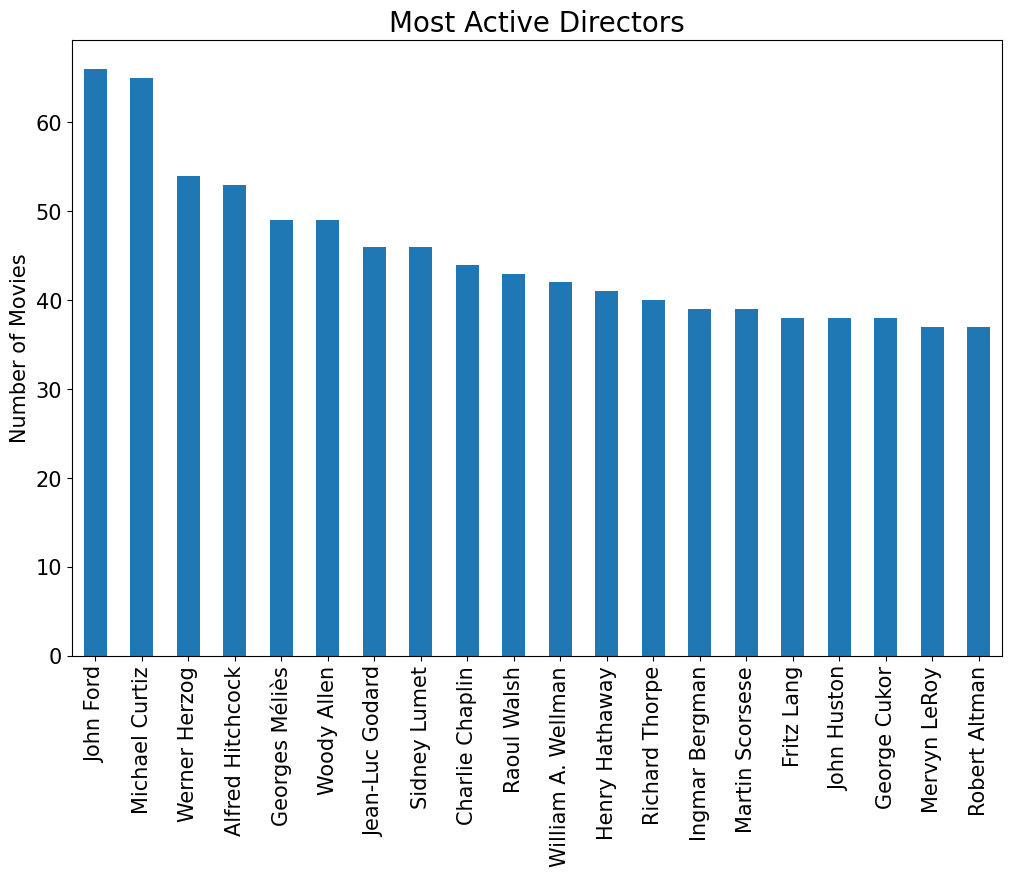

In [163]:
plt.figure(figsize=(12,8))
movies_complete.director.value_counts().head(20).plot(kind='bar',fontsize=15)
plt.title("Most Active Directors", fontsize=20)
plt.ylabel('Number of Movies', fontsize=15)
plt.show()

In [164]:
movies_complete.groupby('director').revenue_musd.sum().nlargest(20)

director
Steven Spielberg    9256.62
Peter Jackson       6528.24
Michael Bay         6437.47
James Cameron       5900.61
David Yates         5334.56
Christopher Nolan   4747.41
Robert Zemeckis     4138.23
Tim Burton          4032.92
Ridley Scott        3917.53
Chris Columbus      3866.84
Roland Emmerich     3798.40
Ron Howard          3714.15
J.J. Abrams         3579.22
Gore Verbinski      3575.34
George Lucas        3341.55
Sam Raimi           3193.79
Francis Lawrence    3183.34
Clint Eastwood      3100.68
Bill Condon         3017.30
Joss Whedon         2963.83
Name: revenue_musd, dtype: float64

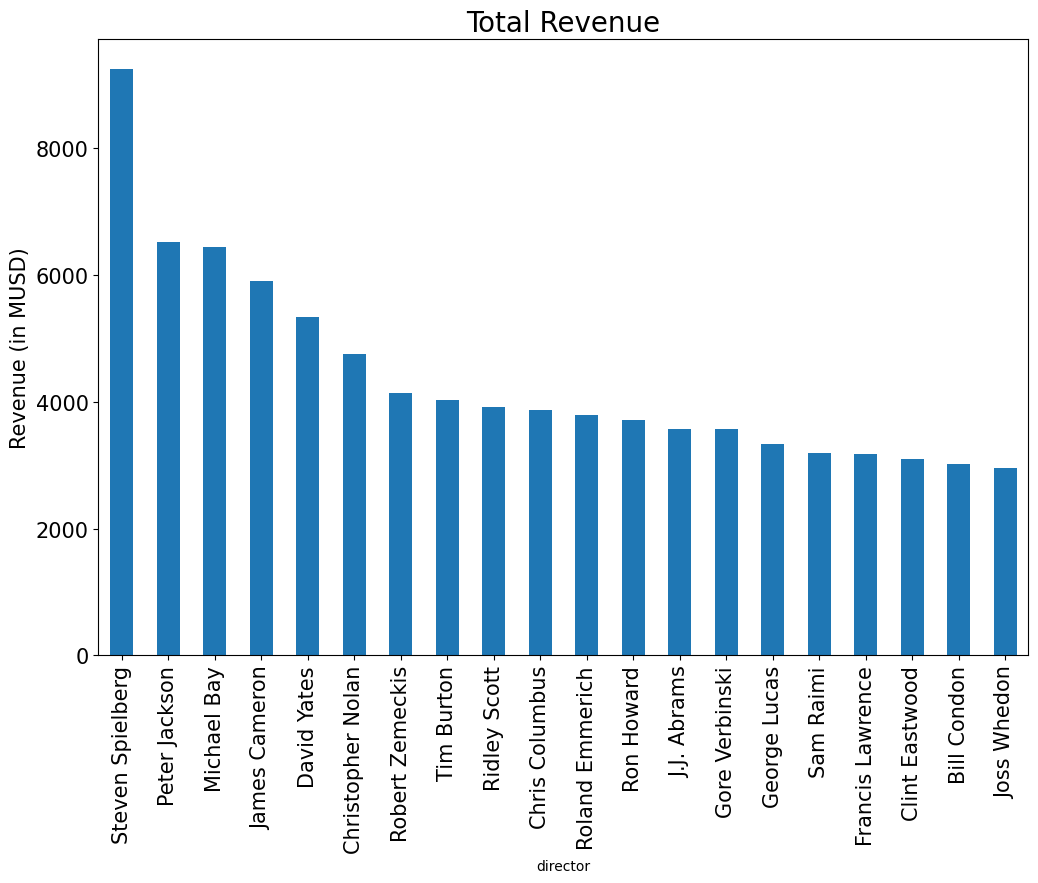

In [165]:
plt.figure(figsize=(12,8))
movies_complete.groupby('director').revenue_musd.sum().nlargest(20).plot(kind='bar',fontsize=15)
plt.title("Total Revenue", fontsize=20)
plt.ylabel('Revenue (in MUSD)', fontsize=15)
plt.show()

In [166]:
directors = movies_complete.groupby('director').agg({'title':'count','vote_average': 'mean','vote_count':'sum'})

In [167]:
directors

,title,vote_average,vote_count
director,,,
Dale Trevillion\t,2,4.00,4.00
Davide Manuli,1,6.90,10.00
E.W. Swackhamer,1,5.90,5.00
Vitaliy Vorobyov,1,5.50,3.00
Yeon Sang-Ho,4,6.60,1039.00
...,...,...,...
Ярополк Лапшин,1,10.00,1.00
پیمان معادی,1,6.00,2.00
塩谷 直義,1,7.20,40.00


In [168]:
directors[(directors.vote_count >= 1000) & (directors.title >= 10)].nlargest(20,('vote_average'))

,title,vote_average,vote_count
director,,,
Hayao Miyazaki,14,7.70,14700.00
Christopher Nolan,11,7.62,67344.00
Krzysztof Kieślowski,10,7.51,1105.00
Quentin Tarantino,10,7.49,45910.00
Wes Anderson,10,7.37,11743.00
David Fincher,10,7.35,37588.00
Akira Kurosawa,30,7.28,3621.00
Spike Jonze,13,7.27,6665.00
Martin Scorsese,39,7.22,35541.00


In [169]:
movies_complete.genres = movies_complete.genres.astype(str)

In [170]:
movies_complete.loc[movies_complete.genres.str.contains('Horror')].groupby('director').revenue_musd.sum().nlargest(20)

director
Paul W.S. Anderson    982.29
James Wan             861.31
Wes Craven            834.93
Francis Lawrence      816.23
Ridley Scott          689.00
Marc Forster          531.87
Steven Spielberg      500.10
William Friedkin      466.40
Darren Lynn Bousman   456.34
M. Night Shyamalan    375.37
Henry Joost           349.07
David R. Ellis        348.74
Adrian Lyne           346.11
James DeMonaco        316.70
Stephen Sommers       311.46
Gore Verbinski        275.91
Guillermo del Toro    261.63
John R. Leonetti      255.27
Fede Alvarez          254.64
Jordan Peele          252.43
Name: revenue_musd, dtype: float64

## Most Successful Actors 

In [171]:
movies_complete.cast

0        Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2        Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3        Whitney Houston|Angela Bassett|Loretta Devine|...
4        Steve Martin|Diane Keaton|Martin Short|Kimberl...
                               ...                        
44686              Leila Hatami|Kourosh Tahami|Elham Korda
44687    Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...
44688    Erika Eleniak|Adam Baldwin|Julie du Page|James...
44689    Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...
44690                                                  NaN
Name: cast, Length: 44691, dtype: object

In [172]:
movies_complete.set_index('id', inplace=True)

In [173]:
movies_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44691 entries, 862 to 461257
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  44691 non-null  object        
 1   tagline                20284 non-null  object        
 2   release_date           44657 non-null  datetime64[ns]
 3   genres                 44691 non-null  object        
 4   belongs_to_collection  4463 non-null   object        
 5   original_language      44681 non-null  object        
 6   budget_musd            8854 non-null   float64       
 7   revenue_musd           7385 non-null   float64       
 8   production_companies   33356 non-null  object        
 9   production_countries   38835 non-null  object        
 10  vote_count             44691 non-null  float64       
 11  vote_average           42077 non-null  float64       
 12  popularity             44691 non-null  float64       
 13

In [175]:
movies_complete.cast.str.split('|')

id
862       [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
8844      [Robin Williams, Jonathan Hyde, Kirsten Dunst,...
15602     [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...
31357     [Whitney Houston, Angela Bassett, Loretta Devi...
11862     [Steve Martin, Diane Keaton, Martin Short, Kim...
                                ...                        
439050          [Leila Hatami, Kourosh Tahami, Elham Korda]
111109    [Angel Aquino, Perry Dizon, Hazel Orencio, Joe...
67758     [Erika Eleniak, Adam Baldwin, Julie du Page, J...
227506    [Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...
461257                                                  NaN
Name: cast, Length: 44691, dtype: object

In [185]:
act = movies_complete.cast.str.split('|', expand=True)
act

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,R. Lee Ermey,Sarah Freeman,Penn Jillette,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,James Handy,Gillian Barber,Brandon Obray,Cyrus Thiedeke,Gary Joseph Thorup,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,Eugene Levy,Lori Alan,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,Leila Hatami,Kourosh Tahami,Elham Korda,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
111109,Angel Aquino,Perry Dizon,Hazel Orencio,Joel Torre,Bart Guingona,Soliman Cruz,Roeder,Angeli Bayani,Dante Perez,Betty Uy-Regala,Modesta,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
67758,Erika Eleniak,Adam Baldwin,Julie du Page,James Remar,Damian Chapa,Louis Mandylor,Tom Wright,Jeremy Lelliott,James Quattrochi,Jason Widener,Joe Sabatino,Kiko Ellsworth,Don Swayze,Peter Dobson,Darrell Dubovsky,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [186]:
act.stack().reset_index(level=1,drop=True).to_frame()

,0
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn
...,...
227506,Iwan Mosschuchin
227506,Nathalie Lissenko
227506,Pavel Pavlov


In [187]:
act = act.stack().reset_index(level=1,drop=True).to_frame()
act

,0
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn
...,...
227506,Iwan Mosschuchin
227506,Nathalie Lissenko
227506,Pavel Pavlov


In [188]:
act.columns = ['Actor']

In [189]:
act = act.merge(movies_complete[['title','revenue_musd','vote_average','popularity']], how='left',left_index=True,right_index=True)
act

,Actor,title,revenue_musd,vote_average,popularity
id,,,,,
2,Turo Pajala,Ariel,NaN,7.10,3.86
2,Susanna Haavisto,Ariel,NaN,7.10,3.86
2,Matti Pellonpää,Ariel,NaN,7.10,3.86
2,Eetu Hilkamo,Ariel,NaN,7.10,3.86
3,Matti Pellonpää,Shadows in Paradise,NaN,7.10,2.29
...,...,...,...,...,...
469172,Vasco Sequeira,Manuel on the Island of Wonders,NaN,NaN,0.00
469172,Armanda Bacelar,Manuel on the Island of Wonders,NaN,NaN,0.00
469172,Rafael de Sousa,Manuel on the Island of Wonders,NaN,NaN,0.00


In [191]:
act.Actor.nunique()

201501

In [192]:
act.Actor.unique()

array(['Turo Pajala', 'Susanna Haavisto', 'Matti Pellonpää', ...,
       'Armanda Bacelar', 'Rafael de Sousa', 'José Antônio Gomes'],
      dtype=object)

In [193]:
act.Actor.value_counts().head(20)

Bess Flowers          240
Christopher Lee       148
John Wayne            125
Samuel L. Jackson     122
Michael Caine         110
Gérard Depardieu      109
John Carradine        109
Jackie Chan           108
Donald Sutherland     108
Frank Welker          107
Robert De Niro        104
Danny Trejo           101
Steve Buscemi         101
Irving Bacon           98
John Goodman           97
Christopher Walken     96
Danny Glover           95
John Hurt              93
Susan Sarandon         92
Dennis Hopper          92
Name: Actor, dtype: int64

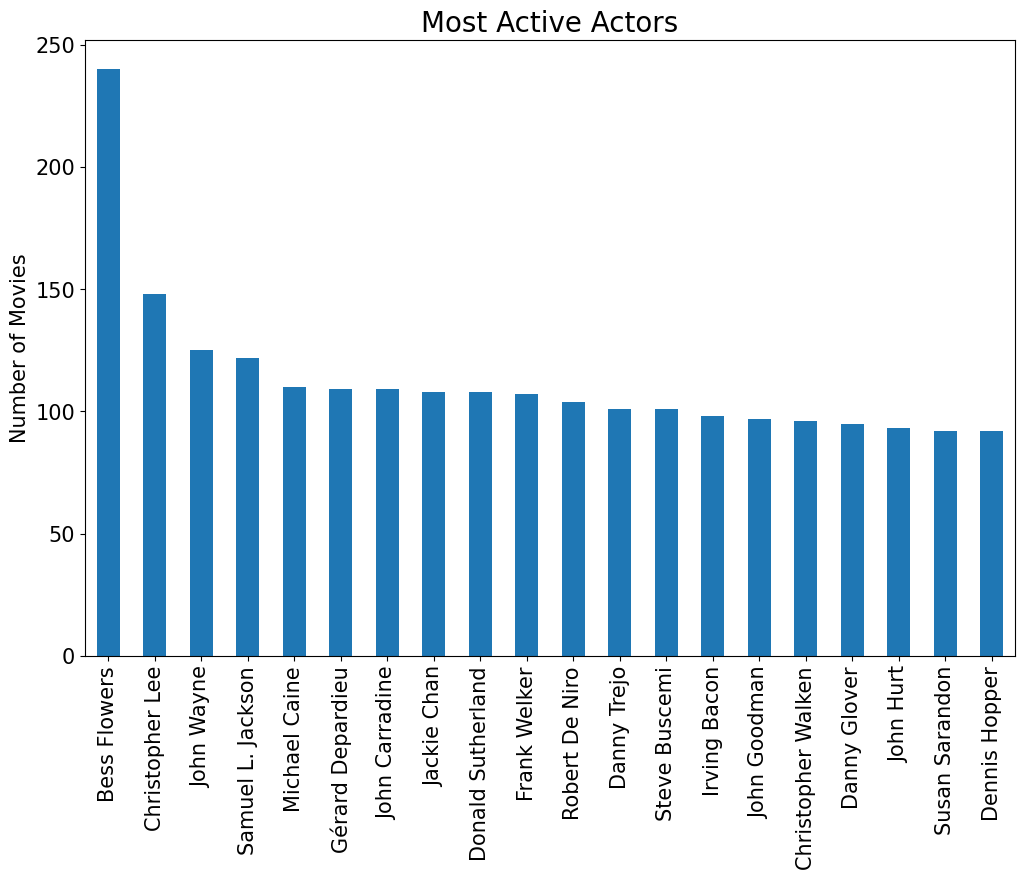

In [194]:
plt.figure(figsize=(12,8))
act.Actor.value_counts().head(20).plot(kind='bar',fontsize=15)
plt.title("Most Active Actors", fontsize=20)
plt.ylabel('Number of Movies', fontsize=15)
plt.show()

In [195]:
agg = act.groupby('Actor').agg(Total_Revenue = ('revenue_musd','sum'), Mean_Revenue = ('revenue_musd','mean'), Mean_Rating = ('vote_average','mean'), Mean_Pop = ('popularity','mean'), Total_Movies = ('Actor','count'))

In [196]:
agg.nlargest(10,'Total_Movies')

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Bess Flowers,368.91,14.76,6.18,2.03,240
Christopher Lee,9417.05,324.73,5.91,4.75,148
John Wayne,236.09,11.24,5.71,3.09,125
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Michael Caine,8053.40,191.75,6.27,8.27,110
Gérard Depardieu,1247.61,95.97,6.05,3.70,109
John Carradine,255.84,19.68,5.55,2.43,109
Donald Sutherland,5390.77,138.22,6.23,7.00,108
Jackie Chan,4699.19,146.85,6.28,5.86,108


In [197]:
agg.nlargest(10,'Total_Revenue')

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Stan Lee,19414.96,647.17,6.51,29.94,48
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Warwick Davis,13256.03,662.80,6.29,13.09,34
Frank Welker,13044.15,326.10,6.31,9.57,107
John Ratzenberger,12596.13,449.86,6.48,10.96,46
Jess Harnell,12234.61,611.73,6.44,10.92,35
Hugo Weaving,11027.58,459.48,6.47,10.97,40
Ian McKellen,11015.59,478.94,6.35,15.45,44
Johnny Depp,10653.76,217.42,6.44,12.38,69


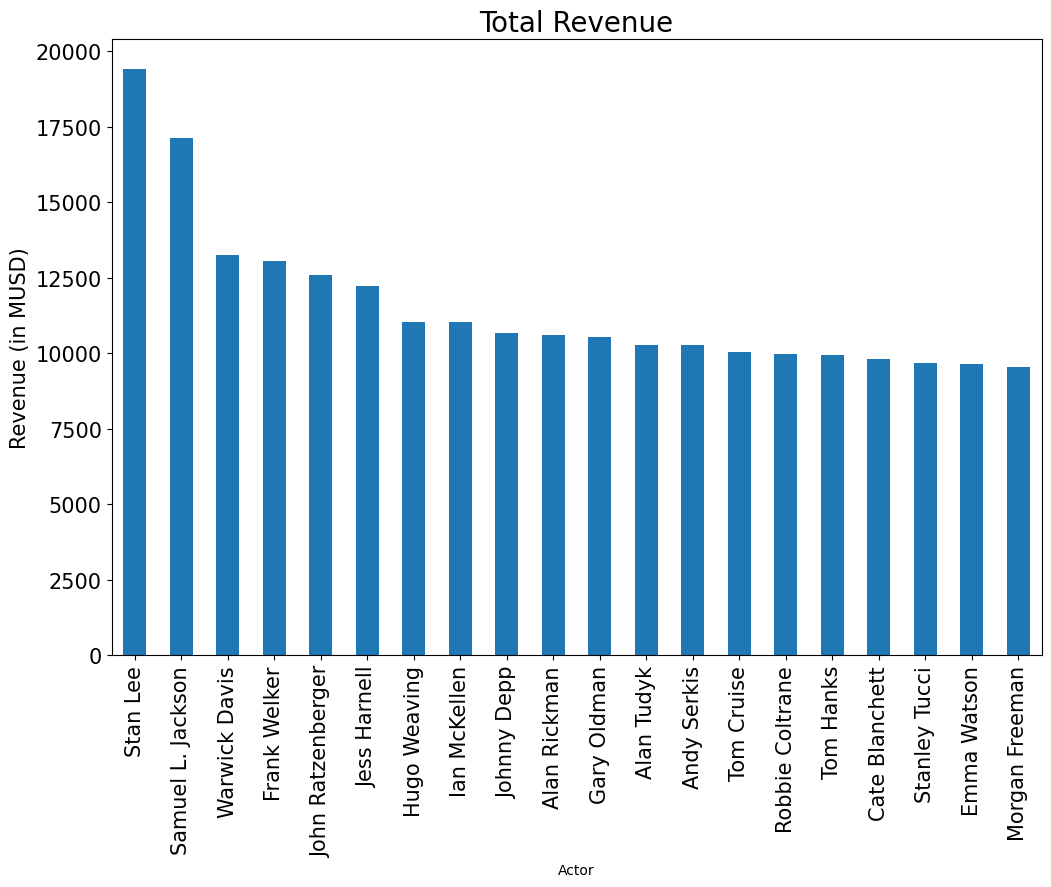

In [198]:
plt.figure(figsize=(12,8))
agg.Total_Revenue.nlargest(20).plot(kind='bar',fontsize=15)
plt.title("Total Revenue", fontsize=20)
plt.ylabel('Revenue (in MUSD)', fontsize=15)
plt.show()

In [199]:
agg.Mean_Revenue.nlargest(10)

Actor
April Marie Thomas   2787.97
Ashley Jeffery       2787.97
Austin Wilson        2787.97
Brandon Jelkes       2787.97
Bravita A. Threatt   2787.97
Carvon Futrell       2787.97
Chris Mala           2787.97
Christa Oliver       2787.97
Christopher Nolen    2787.97
Colin Bleasdale      2787.97
Name: Mean_Revenue, dtype: float64

In [200]:
act[act.Actor == 'Ashley Jeffery']

,Actor,title,revenue_musd,vote_average,popularity
id,,,,,
19995,Ashley Jeffery,Avatar,2787.97,7.20,185.07


In [201]:
agg[agg.Total_Movies >= 10].nlargest(10, 'Mean_Revenue')

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Gloria Stuart,1845.03,1845.03,6.37,3.48,18
Keith Richards,2967.71,989.24,6.46,5.03,23
Zoë Wanamaker,976.48,976.48,6.33,6.82,10
James Cameron,1862.08,931.04,7.06,4.69,12
Matthew Lewis,7915.31,879.48,7.37,23.10,11
Luke de Woolfson,1720.67,860.34,5.72,8.77,11
Yuri Lowenthal,1708.16,854.08,6.19,19.88,17
Dominic Monaghan,3289.61,822.40,6.05,10.62,11
Philip Ng,821.71,821.71,5.92,6.35,10


In [202]:
agg[agg.Total_Movies >= 10].nlargest(10, 'Mean_Rating')

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Masao Hayama,0.00,NaN,8.84,0.32,10
David Attenborough,0.00,NaN,8.27,2.15,11
Emil Jannings,0.00,NaN,7.78,1.70,10
Halit Akçatepe,0.21,0.21,7.78,0.74,10
Yo Oizumi,511.21,102.24,7.72,7.51,13
Şener Şen,11.07,3.69,7.69,0.91,16
Ayşen Gruda,0.91,0.46,7.68,0.74,10
Akira Tani,0.33,0.16,7.65,5.04,12
Joseph Oliveira,3543.44,354.34,7.64,34.45,10


In [203]:
agg[agg.Total_Movies >= 10].nlargest(10, 'Mean_Pop')

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Katy Mixon,1519.57,151.96,5.84,51.97,12
Terry Notary,6947.21,694.72,6.47,51.58,11
Goran D. Kleut,2568.94,366.99,6.00,42.32,10
Mark Smith,2195.52,243.95,6.55,40.08,11
Jon Hamm,3449.35,191.63,6.33,39.42,25
Gal Gadot,5449.53,495.41,6.33,37.39,11
Ava Acres,6272.36,482.49,5.99,36.26,21
Emma Watson,9639.20,535.51,6.77,35.97,19
Joseph Oliveira,3543.44,354.34,7.64,34.45,10
